<a href="https://colab.research.google.com/github/merttezcan/ML-Homeworks/blob/main/linear_regression_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import statsmodels.api as sm
from matplotlib import rcParams
import csv
from sklearn.datasets.base import Bunch
from sklearn.linear_model import LinearRegression

In [ ]:
def load_my_dataset():
    with open('boston_house_prices-rev.csv') as csv_file:
        data_file = csv.reader(csv_file)
        temp = next(data_file)
        n_samples = 506
        n_features = 13
        feature_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'] 
        target_names = ['MEDVx1000USD']
        data = np.empty((n_samples, n_features))
        target = np.empty((n_samples,), dtype=np.int)

        for i, sample in enumerate(data_file):
            data[i] = np.asarray(sample[:-1], dtype=np.float64)
            target[i] = np.asarray(sample[-1], dtype=np.float64)

    return Bunch(data=data, target=target, feature_names = feature_names, target_names = target_names)

price_data = load_my_dataset()

In [ ]:
print(price_data.keys())

dict_keys(['data', 'target', 'feature_names', 'target_names'])


In [ ]:
print(price_data.data.shape)

(506, 13)


In [ ]:
print(price_data.feature_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [ ]:
boston = pd.DataFrame(price_data.data)
print(boston.head())

        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]


In [ ]:
boston.columns = price_data.feature_names
print(boston.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [ ]:
print(price_data.target.shape)

(506,)


In [ ]:
boston['PRICE'] = price_data.target
print(boston.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98     24
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14     21
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03     34
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94     33
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33     36

[5 rows x 14 columns]


In [ ]:
print(boston.describe())

             CRIM          ZN       INDUS  ...           B       LSTAT       PRICE
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.114625
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.241893
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.000000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.000000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]


In [ ]:
X = boston.drop('PRICE', axis = 1)
Y = boston['PRICE']

In [ ]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


Testing accuracy:  73.16234660398293
Model accuracy:  73.61120867980134
MSE:  21.03510715849913


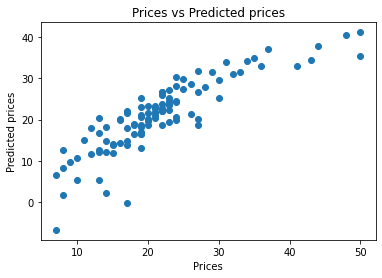

In [ ]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
from sklearn.metrics import mean_squared_error, r2_score
print("Testing accuracy: ", lm.score(X_test, Y_test)*100)
print("Model accuracy: ", r2_score(Y, lm.predict(X))*100)
print("MSE: ", sklearn.metrics.mean_squared_error(Y_test, Y_pred))